In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

In [105]:
# List folders inside the folder
def list_folders(folder):
    folders = [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]
    return folders


# List files inside the folder 
def list_files(folder):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    return files

list_files('Test1')

list_folders('Test1')

['32-10-2', '2-10-2', '4-10-2', '8-10-2']

In [106]:
target_folders = ["Test1", "Test2", "Test3"]

target_files = []

for folder in target_folders:
    scenarios = list_folders(folder)
    for scenario in scenarios:
        path = folder + "/" + scenario
        files = list_files(folder + "/" + scenario)
        files = [path + "/" + f for f in files]
    
        # remove the file that is not resultado.txt
        files = [f for f in files if f.endswith("resultado.txt")]
        target_files.append(files)

In [107]:
for folder in target_folders:
    scenarios = list_files(folder)
    for scenario in scenarios:
        os.remove(folder + "/" + scenario)

In [109]:
# loop through all files and print all lines
for file in target_files:
    time_vector     = []
    date_format_str = '%H:%M:%S.%f'
    folder_path     = file[0].split("/")[0]
    n               = file[0].split("/")[1].split("-")[0]

    with open(file[0]) as f:
        first_line = f.readline()
        time_stamp = first_line.split()[-1]
        start      = datetime.strptime(time_stamp, date_format_str)

        last_line  = f.readlines()[-1]
        time_stamp = last_line.split()[-1]
        end        = datetime.strptime(time_stamp, date_format_str)

        diff = end - start
        diff = diff.total_seconds()
        
        # save diff in csv file
        with open(f'{folder_path}/time_diff.csv', 'a') as target:
            target.write(f"{n},{diff}\n")

        print(file[0], diff)

Test1/32-10-2/resultado.txt 639.206
Test1/2-10-2/resultado.txt 38.158
Test1/4-10-2/resultado.txt 78.167
Test1/8-10-2/resultado.txt 158.286
Test2/32-5-1/resultado.txt 159.433
Test2/2-5-1/resultado.txt 9.023
Test2/4-5-1/resultado.txt 19.05
Test2/64-5-1/resultado.txt 319.966
Test2/8-5-1/resultado.txt 39.105
Test2/16-5-1/resultado.txt 79.213
Test3/64-3-0/resultado.txt 0.114
Test3/8-3-0/resultado.txt 0.021
Test3/128-3-0/resultado.txt 0.261
Test3/16-3-0/resultado.txt 0.026
Test3/32-3-0/resultado.txt 0.072
Test3/2-3-0/resultado.txt 0.006
Test3/4-3-0/resultado.txt 0.007


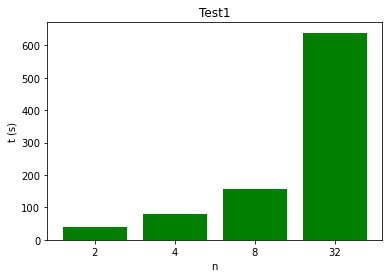

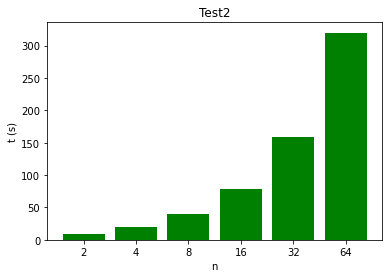

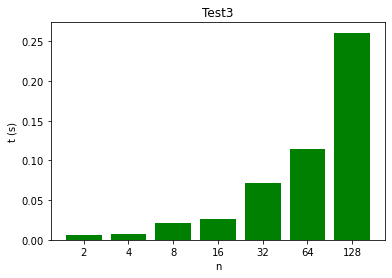

In [110]:
# Read the csv
for folder in target_folders:
    data = pd.read_csv(f'{folder}/time_diff.csv', names=['n', 't'])
    data = data.sort_values(by=['n'])

    keys   = data['n']
    values =  data['t']

    fig, ax = plt.subplots()

    # create the xticks locations
    x = range(len(keys))

    ax.bar(x, values, 0.8, color='g', align='center')

    # set the ticks and labels
    ax.set_xticks(x)
    _ = ax.set_xticklabels(keys)

    # set the xlabel and ylabel
    ax.set_xlabel('n')
    ax.set_ylabel('t (s)')

    # set the title
    ax.set_title(f'{folder}')
